# Task 1


In [236]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from statsmodels.datasets import co2
from sklearn.model_selection import train_test_split
from keras.layers import Input

In [237]:
#Reading the dataset.
df= pd.read_csv(r"C:\Users\DELL\Desktop\Data Analytics\Monthly_Modal_Time_Series_.csv")
df.head()

,NTD ID,Agency,Organization Type,Mode,Type of Service,Rail (True/False),Primary UZA UACE Code,Primary UZA Name,Primary UZA Sq Miles,Primary UZA Population,...,Pedestrian Not in Crosswalk Injuries,Pedestrian Crossing Tracks Injuries,Pedestrian Walking Along Tracks Injuries,Other Vehicle Occupant Injuries,Other Injuries,Trespasser Injuries,Suicide Injuries,Total Other Injuries,Total Injuries,Rate
0,50158,University of Michigan Parking and Transportat...,University,MB,DO,False,2602,"Ann Arbor, MI",143.45,317689,...,0,0,0,0,0,0,0,0,0,0.000000
1,50158,University of Michigan Parking and Transportat...,University,MB,DO,False,2602,"Ann Arbor, MI",143.45,317689,...,0,0,0,0,0,0,0,0,0,0.055038
2,50158,University of Michigan Parking and Transportat...,University,MB,DO,False,2602,"Ann Arbor, MI",143.45,317689,...,0,0,0,0,0,0,0,0,0,0.029486
3,50158,University of Michigan Parking and Transportat...,University,MB,DO,False,2602,"Ann Arbor, MI",143.45,317689,...,0,0,0,0,0,0,0,0,0,0.013352
4,50158,University of Michigan Parking and Transportat...,University,MB,DO,False,2602,"Ann Arbor, MI",143.45,317689,...,0,0,0,0,0,0,0,0,0,0.000000


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39729 entries, 0 to 39728
Data columns (total 65 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   NTD ID                                      39729 non-null  int64  
 1   Agency                                      39729 non-null  object 
 2   Organization Type                           39729 non-null  object 
 3   Mode                                        39729 non-null  object 
 4   Type of Service                             39729 non-null  object 
 5   Rail (True/False)                           39729 non-null  bool   
 6   Primary UZA UACE Code                       39729 non-null  int64  
 7   Primary UZA Name                            39729 non-null  object 
 8   Primary UZA Sq Miles                        39729 non-null  float64
 9   Primary UZA Population                      39729 non-null  int64  
 10  Service Ar

In [239]:
#First, let's make sure all of our columns are numerical.
from sklearn.preprocessing import LabelEncoder
columns = ['Organization Type', 'Agency' , 'Mode', 'Rail (True/False)', 'Type of Service', 'Primary UZA Name']
label_encoder = LabelEncoder()

for col in columns:
    df[col] = label_encoder.fit_transform(df[col])
df.head()

,NTD ID,Agency,Organization Type,Mode,Type of Service,Rail (True/False),Primary UZA UACE Code,Primary UZA Name,Primary UZA Sq Miles,Primary UZA Population,...,Pedestrian Not in Crosswalk Injuries,Pedestrian Crossing Tracks Injuries,Pedestrian Walking Along Tracks Injuries,Other Vehicle Occupant Injuries,Other Injuries,Trespasser Injuries,Suicide Injuries,Total Other Injuries,Total Injuries,Rate
0,50158,494,8,7,0,0,2602,8,143.45,317689,...,0,0,0,0,0,0,0,0,0,0.000000
1,50158,494,8,7,0,0,2602,8,143.45,317689,...,0,0,0,0,0,0,0,0,0,0.055038
2,50158,494,8,7,0,0,2602,8,143.45,317689,...,0,0,0,0,0,0,0,0,0,0.029486
3,50158,494,8,7,0,0,2602,8,143.45,317689,...,0,0,0,0,0,0,0,0,0,0.013352
4,50158,494,8,7,0,0,2602,8,143.45,317689,...,0,0,0,0,0,0,0,0,0,0.000000


In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39729 entries, 0 to 39728
Data columns (total 65 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   NTD ID                                      39729 non-null  int64  
 1   Agency                                      39729 non-null  int32  
 2   Organization Type                           39729 non-null  int32  
 3   Mode                                        39729 non-null  int32  
 4   Type of Service                             39729 non-null  int32  
 5   Rail (True/False)                           39729 non-null  int64  
 6   Primary UZA UACE Code                       39729 non-null  int64  
 7   Primary UZA Name                            39729 non-null  int32  
 8   Primary UZA Sq Miles                        39729 non-null  float64
 9   Primary UZA Population                      39729 non-null  int64  
 10  Service Ar

# Prediction without feature selection. 

In [241]:
#Choosing 'Rate' as the target value.
X = df.drop(["Rate"], axis=1)
y = df["Rate"]

In [242]:
#Making a dataframe to store the results over multiple iterations
results_SVR_no = pd.DataFrame(columns=['Model', 'Random_State', 'MSE', 'R2'])

**SVR**

In [243]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

for i in range(15):
    
    #Splitting the dataset into training and testing sets. 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i) 
    #Standarizing the features due to a wide range of values in the dataset.
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    svr_model = SVR()
    svr_model.fit(X_train_scaled, y_train)
    y_pred = svr_model.predict(X_test_scaled)
    
    #Calculating the metrices
    mse_svr = mean_squared_error(y_test, y_pred)
    r2_svr = r2_score(y_test, y_pred)
    results_SVR_no.loc[len(results_SVR_no)] = ['SVR', i+1, mse_svr,r2_svr]
results_SVR_no

,Model,Random_State,MSE,R2
0,SVR,1,0.003091,-1.733872
1,SVR,2,0.002760,-1.481468
2,SVR,3,0.002644,-1.118753
3,SVR,4,0.002979,-1.057862
4,SVR,5,0.002408,-1.287198
5,SVR,6,0.003092,-1.933874
6,SVR,7,0.002659,-1.367391
7,SVR,8,0.003066,-1.416577
8,SVR,9,0.002926,-1.680759
9,SVR,10,0.003125,-1.482923


In [244]:
SVR_no_avgMSE = np.mean(results_SVR_no['MSE'])
SVR_no_avgR2 = np.mean(results_SVR_no['R2'])
print("Average MSE for SVR without feature selection:", SVR_no_avgMSE)
print("Average R2 for SVR without feature selection:", SVR_no_avgR2)

Average MSE for SVR without feature selection: 0.002820528603219646
Average R2 for SVR without feature selection: -1.3966906000070414


**DTR**

In [245]:
#Making a dataframe to store the results over multiple iterations
results_DTR_no = pd.DataFrame(columns=['Model', 'Random_State', 'MSE', 'R2'])

In [246]:
from sklearn.tree import DecisionTreeRegressor
for i in range(15):
    #Splitting the dataset into training and testing sets. 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i) 
    #Standarizing the features due to a wide range of values in the dataset.
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    tree_model = DecisionTreeRegressor(max_depth=5)
    tree_model.fit(X_train_scaled, y_train)
    y_pred = tree_model.predict(X_test_scaled)
    #Calculating the metrices
    mse_dtr = mean_squared_error(y_test, y_pred)
    r2_dtr = r2_score(y_test, y_pred)
    results_DTR_no.loc[len(results_DTR_no)] = ['DTR', i+1, mse_dtr,r2_dtr]
results_DTR_no

,Model,Random_State,MSE,R2
0,DTR,1,0.000480,0.575322
1,DTR,2,0.000460,0.586466
2,DTR,3,0.000478,0.616628
3,DTR,4,0.000484,0.665992
4,DTR,5,0.000465,0.558171
5,DTR,6,0.000467,0.556942
6,DTR,7,0.000474,0.577966
7,DTR,8,0.000459,0.638321
8,DTR,9,0.000467,0.572611
9,DTR,10,0.000459,0.635623


In [247]:
DTR_no_avgMSE = np.mean(results_DTR_no['MSE'])
DTR_no_avgR2 = np.mean(results_DTR_no['R2'])
print("Average MSE for DTR without feature selection:", DTR_no_avgMSE)
print("Average R2 for DTR without feature selection:", DTR_no_avgR2)

Average MSE for DTR without feature selection: 0.0004675914802489803
Average R2 for DTR without feature selection: 0.6017222989420468


**LSTM**

In [248]:
# Set 'Year' and 'Month' as index
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))
df.set_index('Date', inplace=True)
df.drop(['Year', 'Month'], axis=1, inplace=True)


In [249]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure all data is of type float32 for LSTM compatibility
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

#Long Short-Term Memory (LSTM)
def create_dataset(X, y, time_step=1):
    Xs, ys = [], []
    for i in range(len(X) - time_step):
        Xs.append(X[i:(i + time_step)])
        ys.append(y[i + time_step])
    return np.array(Xs), np.array(ys)

time_step = 3
X_train_lstm, y_train_lstm = create_dataset(X_train.values, y_train.values, time_step)
X_test_lstm, y_test_lstm = create_dataset(X_test.values, y_test.values, time_step)

X_train_lstm = X_train_lstm.reshape(X_train_lstm.shape[0], X_train_lstm.shape[1], X_train_lstm.shape[2])
X_test_lstm = X_test_lstm.reshape(X_test_lstm.shape[0], X_test_lstm.shape[1], X_test_lstm.shape[2])

model_lstm = Sequential()
model_lstm.add(Input(shape=(time_step, X_train_lstm.shape[2])))
model_lstm.add(LSTM(50, return_sequences=True))
model_lstm.add(LSTM(50, return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train_lstm, y_train_lstm, epochs=3, batch_size=1, verbose=2)

y_pred_lstm = model_lstm.predict(X_test_lstm)
y_pred_lstm = y_pred_lstm.flatten()

# Evaluation and Visualization
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, r2

mse_lstm, r2_lstm = evaluate_model(y_test_lstm, y_pred_lstm)
print("LSTM - MSE without feature selection:", mse_lstm, "R² without feature selection:", r2_lstm)


Epoch 1/3
31780/31780 - 68s - 2ms/step - loss: 0.0013
Epoch 2/3
31780/31780 - 83s - 3ms/step - loss: 0.0012
Epoch 3/3
31780/31780 - 62s - 2ms/step - loss: 0.0012
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
LSTM - MSE without feature selection: 0.0013761505 R² without feature selection: -0.012809679752781244


# Select K_best Feature Selection Method

In [251]:
from sklearn.feature_selection import SelectKBest, f_regression
k_best = SelectKBest(score_func=f_regression, k=5)
X_k_best = k_best.fit_transform(X, y)
k_best_features = X.columns[k_best.get_support()]
print("K-Best selected features:", k_best_features)

K-Best selected features: Index(['Vehicles', 'Vehicle Revenue Hours',
       'Total Events Not Otherwise Classified', 'Total Events',
       'Total Injuries'],
      dtype='object')


In [252]:
k_best_features=['Vehicles', 'Vehicle Revenue Hours',
       'Total Events Not Otherwise Classified', 'Total Events',
       'Total Injuries']

**SVR with select k_best selection method.**

In [253]:
# Selected features and Y 
X1 = df[k_best_features]
y1 = df['Rate']

In [254]:
# DataFrame to store results
results_SVR_with_1 = pd.DataFrame(columns=['Model', 'Random_State', 'MSE', 'R2'])

In [255]:
for i in range(15):
    #Splitting the dataset into training and testing sets. 
    X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=i) 
    #Standarizing the features due to a wide range of values in the dataset.
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    svr_model = SVR()
    svr_model.fit(X_train_scaled, y_train)
    y_pred = svr_model.predict(X_test_scaled)
    
    #Calculating the metrices
    mse_svr_1 = mean_squared_error(y_test, y_pred)
    r2_svr_1 = r2_score(y_test, y_pred)
    results_SVR_with_1.loc[len(results_SVR_with_1)] = ['SVR', i+1, mse_svr_1,r2_svr_1]
results_SVR_with_1

,Model,Random_State,MSE,R2
0,SVR,1,0.005842,-4.167740
1,SVR,2,0.005829,-4.241322
2,SVR,3,0.005844,-3.683199
3,SVR,4,0.005826,-3.024238
4,SVR,5,0.005880,-4.585186
5,SVR,6,0.005824,-4.526594
6,SVR,7,0.005843,-4.202235
7,SVR,8,0.006003,-3.731417
8,SVR,9,0.005886,-4.392084
9,SVR,10,0.005964,-3.738101


In [256]:
SVR_wtih1_avgMSE = np.mean(results_SVR_with_1['MSE'])
SVR_with1_avgR2 = np.mean(results_SVR_with_1['R2'])
print("Average MSE for SVR with k-best selection:", SVR_wtih1_avgMSE)
print("Average R2 for SVR with k-best selection:", SVR_with1_avgR2)

Average MSE for SVR with k-best selection: 0.005881805771118618
Average R2 for SVR with k-best selection: -4.010344791581505


**DTR with select k-best feature selection method.**

In [257]:
# DataFrame to store results
results_DTR_with_1 = pd.DataFrame(columns=['Model', 'Random_State', 'MSE', 'R2'])

In [258]:
for i in range(15):
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=i)

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    
    tree_model = DecisionTreeRegressor(max_depth=5)
    tree_model.fit(X_train_scaled, y_train)
    y_pred = tree_model.predict(X_test_scaled)
    
    #Calculating the metrices
    mse_dtr_1 = mean_squared_error(y_test, y_pred)
    r2_dtr_1 = r2_score(y_test, y_pred)
    results_DTR_with_1.loc[len(results_DTR_with_1)] = ['DTR', i+1, mse_dtr_1,r2_dtr_1]
    
results_DTR_with_1

,Model,Random_State,MSE,R2
0,DTR,1,0.000474,0.580869
1,DTR,2,0.000469,0.578421
2,DTR,3,0.000478,0.617074
3,DTR,4,0.000489,0.662057
4,DTR,5,0.000477,0.546836
5,DTR,6,0.000474,0.549816
6,DTR,7,0.000483,0.569755
7,DTR,8,0.000471,0.628900
8,DTR,9,0.000477,0.562917
9,DTR,10,0.000465,0.630937


In [259]:
DTR_with1_avgMSE = np.mean(results_DTR_with_1['MSE'])
DTR_with1_avgR2 = np.mean(results_DTR_with_1['R2'])
print("Average MSE for DTR with k-best selection:", DTR_with1_avgMSE)
print("Average R2 for DTR with k-best selection:", DTR_with1_avgR2)

Average MSE for DTR with k-best selection: 0.0004749318877099485
Average R2 for DTR with k-best selection: 0.5953184218657585


**LSTM with select k_best feature selection method.**

In [266]:
X_selected = X1[k_best_features]
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y1, test_size=0.2, random_state=42)

# Ensure all data is of type float32 for LSTM compatibility
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)
#Long Short-Term Memory (LSTM)
def create_dataset(X, y, time_step=1):
    Xs, ys = [], []
    for i in range(len(X) - time_step):
        Xs.append(X[i:(i + time_step)])
        ys.append(y[i + time_step])
    return np.array(Xs), np.array(ys)

time_step = 3
X_train_lstm, y_train_lstm = create_dataset(X_train.values, y_train.values, time_step)
X_test_lstm, y_test_lstm = create_dataset(X_test.values, y_test.values, time_step)

X_train_lstm = X_train_lstm.reshape(X_train_lstm.shape[0], X_train_lstm.shape[1], X_train_lstm.shape[2])
X_test_lstm = X_test_lstm.reshape(X_test_lstm.shape[0], X_test_lstm.shape[1], X_test_lstm.shape[2])

model_lstm = Sequential()
model_lstm.add(Input(shape=(time_step, X_train_lstm.shape[2])))
model_lstm.add(LSTM(50, return_sequences=True))
model_lstm.add(LSTM(50, return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train_lstm, y_train_lstm, epochs=3, batch_size=1, verbose=2)

y_pred_lstm = model_lstm.predict(X_test_lstm)
y_pred_lstm = y_pred_lstm.flatten()

# Evaluation and Visualization
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, r2

mse_lstm1, r2_lstm1 = evaluate_model(y_test_lstm, y_pred_lstm)
print("LSTM with K-best- MSE:", mse_lstm1, "R²:", r2_lstm1)


Epoch 1/3
31780/31780 - 57s - 2ms/step - loss: 0.0012
Epoch 2/3
31780/31780 - 51s - 2ms/step - loss: 0.0012
Epoch 3/3
31780/31780 - 51s - 2ms/step - loss: 0.0012
249/249 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
LSTM with K-best- MSE: 0.0013668357 R²: -0.005954162222751691


# Sequential feature selection method

In [217]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
sfs = SequentialFeatureSelector(model, n_features_to_select=5, direction='forward') 
sfs.fit(X_train, y_train)
selected_features2 = X.columns[sfs.get_support()]
print("Selected features:", selected_features2)

Selected features: Index(['Vehicle Revenue Miles', 'Vehicle Revenue Hours',
       'Unlinked Passenger Trips', 'Total Collisions', 'Total Injuries'],
      dtype='object')


**SVR with sequential selection method.**

In [219]:
# Selected features and Y 
X2 = df[selected_features2]
y2 = df['Rate']

In [220]:
# DataFrame to store results
results_SVR_with_2 = pd.DataFrame(columns=['Model', 'Random_State', 'MSE', 'R2'])

In [222]:
for i in range(15):
    #Splitting the dataset into training and testing sets. 
    X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=i) 
    #Standarizing the features due to a wide range of values in the dataset.
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    svr_model = SVR()
    svr_model.fit(X_train_scaled, y_train)
    y_pred = svr_model.predict(X_test_scaled)
    
    #Calculating the metrices
    mse_svr_2 = mean_squared_error(y_test, y_pred)
    r2_svr_2 = r2_score(y_test, y_pred)
    results_SVR_with_2.loc[len(results_SVR_with_2)] = ['SVR', i+1, mse_svr_2,r2_svr_2]
results_SVR_with_2

,Model,Random_State,MSE,R2
0,SVR,1,0.006189,-4.474801
1,SVR,2,0.006106,-4.489872
2,SVR,3,0.006283,-4.035170
3,SVR,4,0.006082,-3.201001
4,SVR,5,0.006087,-4.782012
5,SVR,6,0.006241,-4.921922
6,SVR,7,0.006139,-4.465252
7,SVR,8,0.006080,-3.792117
8,SVR,9,0.006126,-4.612142
9,SVR,10,0.006234,-3.952955


In [223]:
SVR_wtih2_avgMSE = np.mean(results_SVR_with_2['MSE'])
SVR_with2_avgR2 = np.mean(results_SVR_with_2['R2'])
print("Average MSE for SVR with sequential  feature selection:", SVR_wtih2_avgMSE)
print("Average R2 for SVR with sequential selection:", SVR_with2_avgR2)

Average MSE for SVR with variance  feature selection: 0.006175419136185992
Average R2 for SVR with variance selection: -4.262390739807246


**DTR with sequential selection method.**

In [147]:
# DataFrame to store results
results_DTR_with_2 = pd.DataFrame(columns=['Model', 'Random_State', 'MSE', 'R2'])

In [224]:
for i in range(15):
    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=i)

    # Standardize the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    
    tree_model = DecisionTreeRegressor(max_depth=5)
    tree_model.fit(X_train_scaled, y_train)
    y_pred = tree_model.predict(X_test_scaled)
    
    #Calculating the metrices
    mse_dtr_2 = mean_squared_error(y_test, y_pred)
    r2_dtr_2 = r2_score(y_test, y_pred)
    results_DTR_with_2.loc[len(results_DTR_with_2)] = ['DTR', i+1, mse_dtr_2,r2_dtr_2]
    
results_DTR_with_2

,Model,Random_State,MSE,R2
0,DTR,1,0.000474,0.580869
1,DTR,2,0.000469,0.578421
2,DTR,3,0.000479,0.616413
3,DTR,4,0.000483,0.666509
4,DTR,5,0.000480,0.544149
5,DTR,6,0.000474,0.549816
6,DTR,7,0.000482,0.570804
7,DTR,8,0.000468,0.631020
8,DTR,9,0.000477,0.563334
9,DTR,10,0.000467,0.628920


In [225]:
DTR_with2_avgMSE = np.mean(results_DTR_with_2['MSE'])
DTR_with2_avgR2 = np.mean(results_DTR_with_2['R2'])
print("Average MSE for DTR with sequential feature selection:", DTR_with2_avgMSE)
print("Average R2 for DTR with sequential selection:", DTR_with2_avgR2)

Average MSE for DTR with variance feature selection: 0.00047010235635682325
Average R2 for DTR with variance feature selection: 0.5994510988010912


**LSTM with sequnetial selection method.**

In [233]:
X_selected2 = X2[selected_features2]
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected2, y2, test_size=0.2, random_state=42)

# Ensure all data is of type float32 for LSTM compatibility
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)
#Long Short-Term Memory (LSTM)
def create_dataset(X, y, time_step=1):
    Xs, ys = [], []
    for i in range(len(X) - time_step):
        Xs.append(X[i:(i + time_step)])
        ys.append(y[i + time_step])
    return np.array(Xs), np.array(ys)

time_step = 3
X_train_lstm, y_train_lstm = create_dataset(X_train.values, y_train.values, time_step)
X_test_lstm, y_test_lstm = create_dataset(X_test.values, y_test.values, time_step)

X_train_lstm = X_train_lstm.reshape(X_train_lstm.shape[0], X_train_lstm.shape[1], X_train_lstm.shape[2])
X_test_lstm = X_test_lstm.reshape(X_test_lstm.shape[0], X_test_lstm.shape[1], X_test_lstm.shape[2])

model_lstm = Sequential()
model_lstm.add(Input(shape=(time_step, X_train_lstm.shape[2])))
model_lstm.add(LSTM(50, return_sequences=True))
model_lstm.add(LSTM(50, return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train_lstm, y_train_lstm, epochs=3, batch_size=1, verbose=2)

y_pred_lstm = model_lstm.predict(X_test_lstm)
y_pred_lstm = y_pred_lstm.flatten()

# Evaluation and Visualization
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, r2

mse_lstm2, r2_lstm2 = evaluate_model(y_test_lstm, y_pred_lstm)
print("LSTM with sequential- MSE:", mse_lstm2, "R²:", r2_lstm2)


Epoch 1/3
31780/31780 - 65s - 2ms/step - loss: 0.0013
Epoch 2/3
31780/31780 - 59s - 2ms/step - loss: 0.0012
Epoch 3/3
31780/31780 - 80s - 3ms/step - loss: 0.0012
249/249 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
LSTM with sequential- MSE: 0.0013609846 R²: -0.001648102509816729


# Visuals

**SVR with different Approaches:**

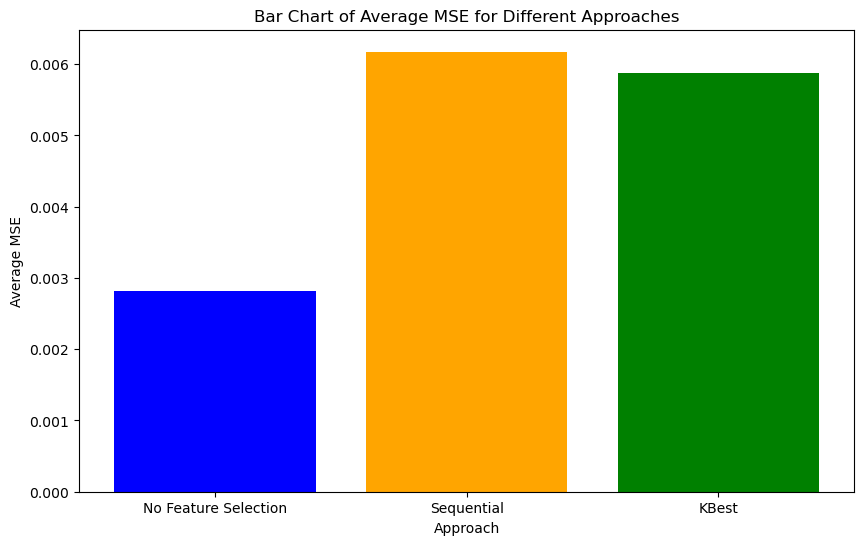

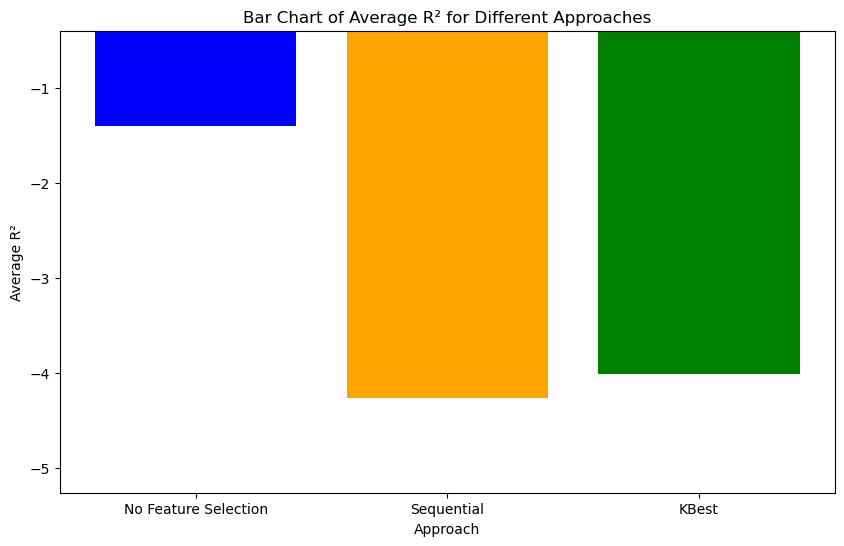

In [228]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming correct average MSE and R² values are calculated as below:
results_SVR_no = {
    'Approach': 'No Feature Selection',
    'Average MSE': SVR_no_avgMSE,
    'Average R2': SVR_no_avgR2
}

results_variance_threshold_SVR = {
    'Approach': 'Sequential',
    'Average MSE': SVR_wtih2_avgMSE,
    'Average R2': SVR_with2_avgR2
}

results_KBEST_SVR = {
    'Approach': 'KBest',
    'Average MSE': SVR_wtih1_avgMSE,
    'Average R2': SVR_with1_avgR2  # Corrected variable for R2
}

# Create a DataFrame to hold all results
results_df = pd.DataFrame([results_SVR_no, results_variance_threshold_SVR, results_KBEST_SVR])

# Bar chart for MSE
plt.figure(figsize=(10, 6))
plt.bar(results_df['Approach'], results_df['Average MSE'], color=['blue', 'orange', 'green'])
plt.title('Bar Chart of Average MSE for Different Approaches')
plt.xlabel('Approach')
plt.ylabel('Average MSE')
plt.show()

# Bar chart for R-squared
plt.figure(figsize=(10, 6))
plt.bar(results_df['Approach'], results_df['Average R2'], color=['blue', 'orange', 'green'])
plt.title('Bar Chart of Average R² for Different Approaches')
plt.xlabel('Approach')
plt.ylabel('Average R²')

# Adjust the y-axis limits
plt.ylim(min(results_df['Average R2']) - 1, max(results_df['Average R2']) + 1)
plt.show()


**DTR with different Approaches:**

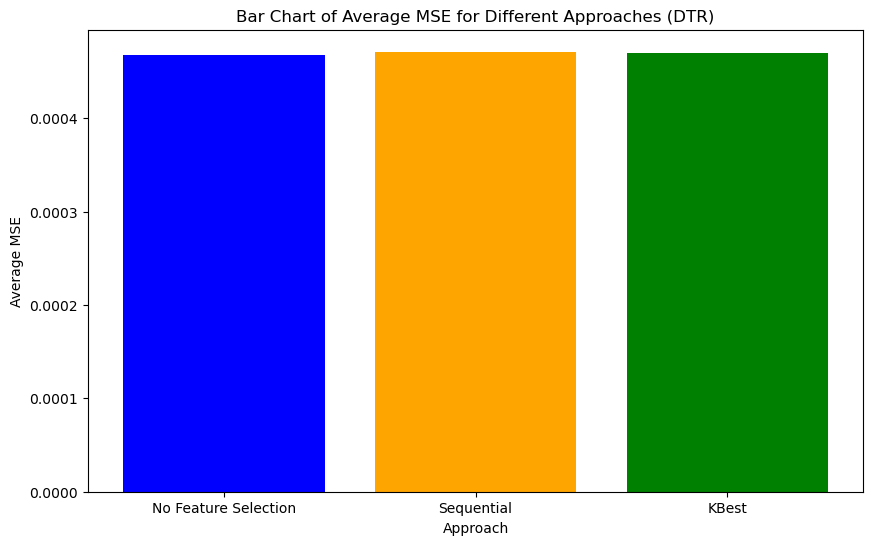

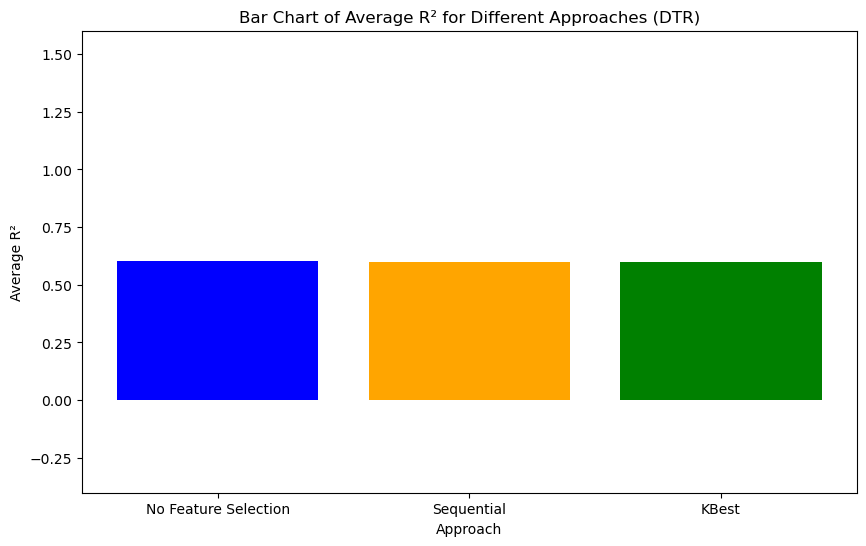

In [232]:
import matplotlib.pyplot as plt
import pandas as pd

# DTR results
DTR_no_avgMSE = 0.0004677430708371981
DTR_no_avgR2 = 0.6015626527274687
DTR_with_variance_avgMSE = 0.0004711604829392849
DTR_with_variance_avgR2 = 0.5986058056663316
DTR_with_kbest_avgMSE = 0.00047010235635682325
DTR_with_kbest_avgR2 = 0.5994510988010912

# Create dictionaries for each approach
results_DTR_no = {
    'Approach': 'No Feature Selection',
    'Average MSE': DTR_no_avgMSE,
    'Average R2': DTR_no_avgR2
}

results_variance_threshold_DTR = {
    'Approach': 'Sequential',
    'Average MSE': DTR_with_variance_avgMSE,
    'Average R2': DTR_with_variance_avgR2
}

results_KBEST_DTR = {
    'Approach': 'KBest',
    'Average MSE': DTR_with_kbest_avgMSE,
    'Average R2': DTR_with_kbest_avgR2
}

# Create a DataFrame to hold all results
results_df = pd.DataFrame([results_DTR_no, results_variance_threshold_DTR, results_KBEST_DTR])

# Bar chart for MSE
plt.figure(figsize=(10, 6))
plt.bar(results_df['Approach'], results_df['Average MSE'], color=['blue', 'orange', 'green'])
plt.title('Bar Chart of Average MSE for Different Approaches (DTR)')
plt.xlabel('Approach')
plt.ylabel('Average MSE')
plt.show()

# Bar chart for R-squared
plt.figure(figsize=(10, 6))
plt.bar(results_df['Approach'], results_df['Average R2'], color=['blue', 'orange', 'green'])
plt.title('Bar Chart of Average R² for Different Approaches (DTR)')
plt.xlabel('Approach')
plt.ylabel('Average R²')

# Adjust the y-axis limits
plt.ylim(min(results_df['Average R2']) - 1, max(results_df['Average R2']) + 1)
plt.show()


**LSTM with different Approaches:**

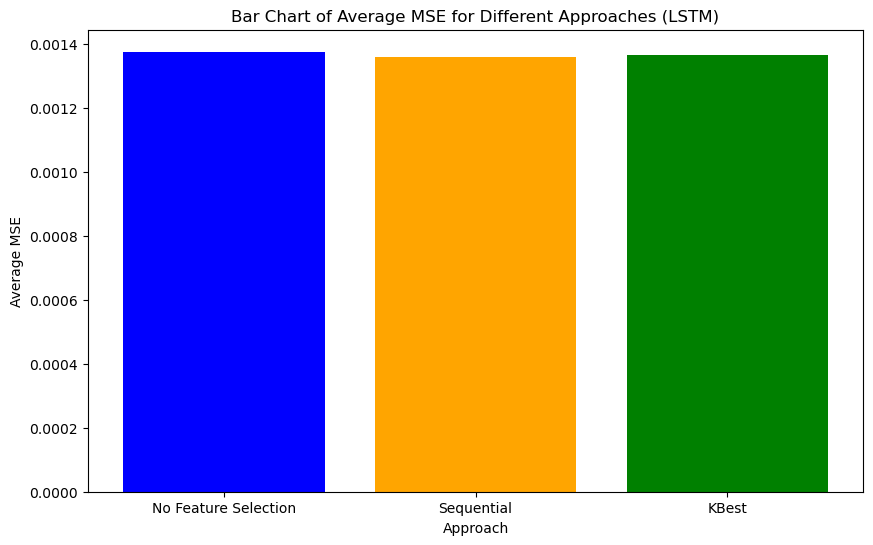

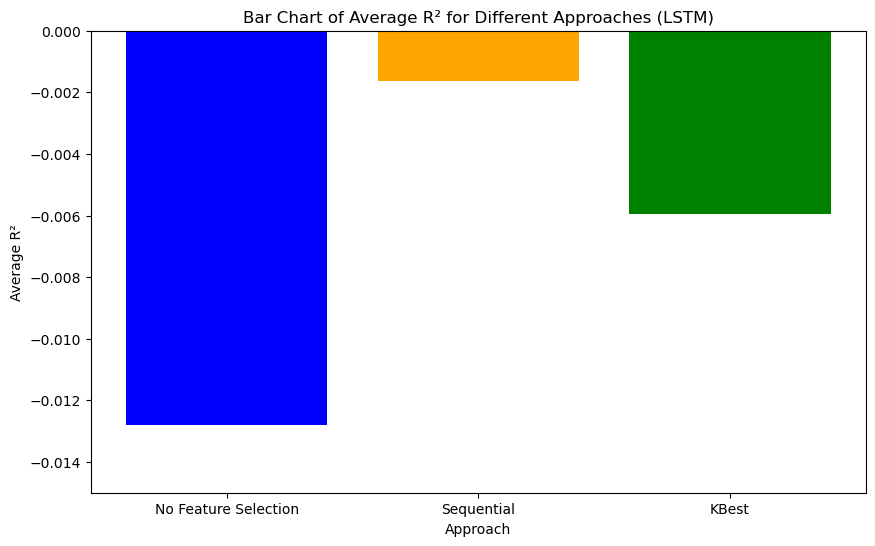

In [273]:
import matplotlib.pyplot as plt
import pandas as pd

# LSTM results
LSTM_no_avgMSE = 0.0013761505
LSTM_no_avgR2 = -0.012809679752781244
LSTM_kbest_avgMSE = 0.0013668357
LSTM_kbest_avgR2 = -0.005954162222751691
LSTM_sequential_avgMSE = 0.0013609846
LSTM_sequential_avgR2 = -0.001648102509816729

# Create dictionaries for each approach
results_LSTM_no = {
    'Approach': 'No Feature Selection',
    'Average MSE': LSTM_no_avgMSE,
    'Average R2': LSTM_no_avgR2
}

results_sequential_LSTM = {
    'Approach': 'Sequential',
    'Average MSE': LSTM_sequential_avgMSE,
    'Average R2': LSTM_sequential_avgR2
}

results_KBEST_LSTM = {
    'Approach': 'KBest',
    'Average MSE': LSTM_kbest_avgMSE,
    'Average R2': LSTM_kbest_avgR2
}

# Create a DataFrame to hold all results
results_df = pd.DataFrame([results_LSTM_no, results_sequential_LSTM, results_KBEST_LSTM])

# Bar chart for MSE
plt.figure(figsize=(10, 6))
plt.bar(results_df['Approach'], results_df['Average MSE'], color=['blue', 'orange', 'green'])
plt.title('Bar Chart of Average MSE for Different Approaches (LSTM)')
plt.xlabel('Approach')
plt.ylabel('Average MSE')
plt.show()

# Bar chart for R-squared
plt.figure(figsize=(10, 6))
plt.bar(results_df['Approach'], results_df['Average R2'], color=['blue', 'orange', 'green'])
plt.title('Bar Chart of Average R² for Different Approaches (LSTM)')
plt.xlabel('Approach')
plt.ylabel('Average R²')

# Adjust the y-axis limits to a smaller range based on the provided values
plt.ylim(-0.015, 0)
plt.show()


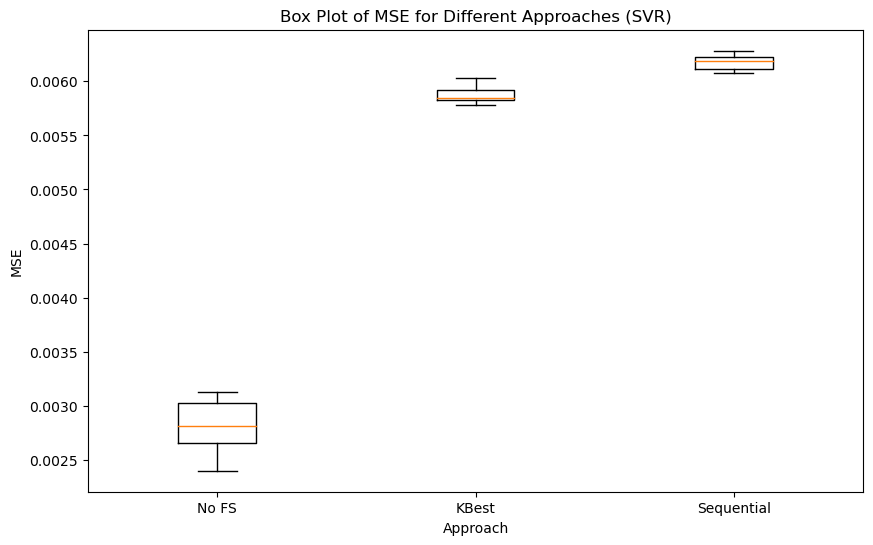

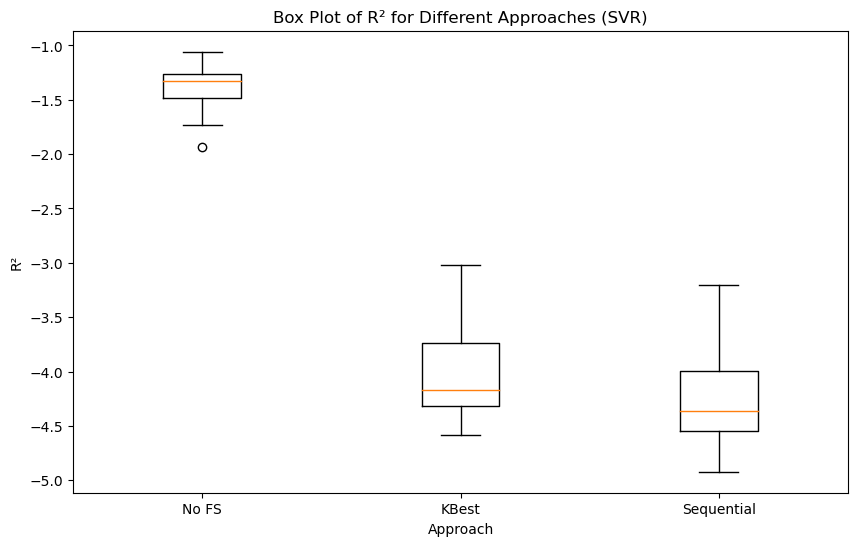

In [263]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming results_SVR_no, results_SVR_with_1, and results_SVR_with_2 contain actual iteration results
# Create example data for demonstration (replace these with actual iteration results)
svr_results_no_fs = results_SVR_no['MSE'].tolist()
svr_results_kbest = results_SVR_with_1['MSE'].tolist()
svr_results_sequential = results_SVR_with_2['MSE'].tolist()

# Box plot for MSE
plt.figure(figsize=(10, 6))
plt.boxplot([svr_results_no_fs, svr_results_kbest, svr_results_sequential], labels=['No FS', 'KBest', 'Sequential'])
plt.title('Box Plot of MSE for Different Approaches (SVR)')
plt.xlabel('Approach')
plt.ylabel('MSE')
plt.show()

# SVR R² results for each iteration
svr_r2_no_fs = results_SVR_no['R2'].tolist()
svr_r2_kbest = results_SVR_with_1['R2'].tolist()
svr_r2_sequential = results_SVR_with_2['R2'].tolist()

# Box plot for R²
plt.figure(figsize=(10, 6))
plt.boxplot([svr_r2_no_fs, svr_r2_kbest, svr_r2_sequential], labels=['No FS', 'KBest', 'Sequential'])
plt.title('Box Plot of R² for Different Approaches (SVR)')
plt.xlabel('Approach')
plt.ylabel('R²')
plt.show()


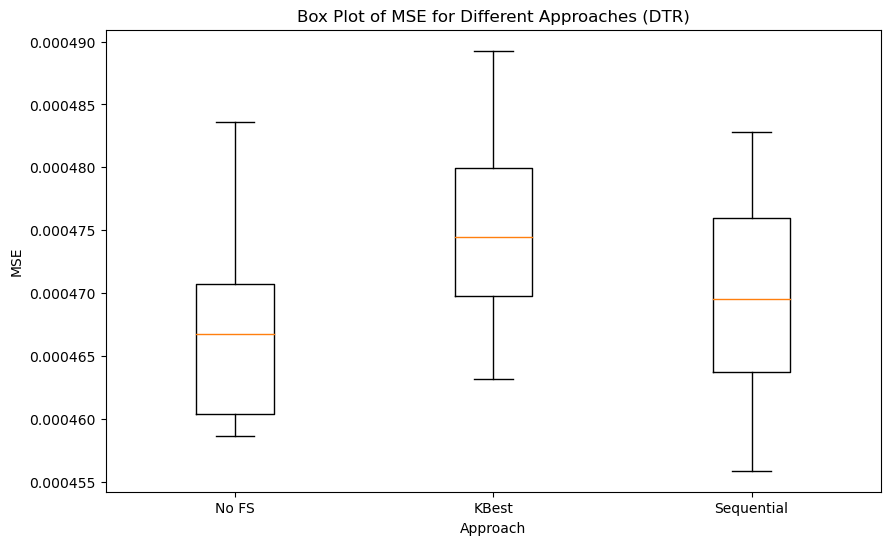

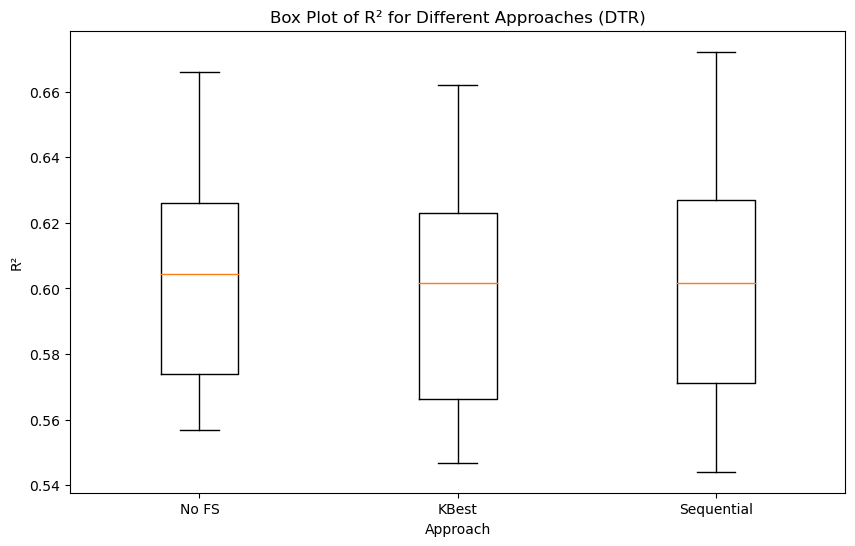

In [264]:
# Assuming results_DTR_no, results_DTR_with_1, and results_DTR_with_2 contain actual iteration results
# Create example data for demonstration (replace these with actual iteration results)
dtr_results_no_fs = results_DTR_no['MSE'].tolist()
dtr_results_kbest = results_DTR_with_1['MSE'].tolist()
dtr_results_sequential = results_DTR_with_2['MSE'].tolist()

# Box plot for MSE
plt.figure(figsize=(10, 6))
plt.boxplot([dtr_results_no_fs, dtr_results_kbest, dtr_results_sequential], labels=['No FS', 'KBest', 'Sequential'])
plt.title('Box Plot of MSE for Different Approaches (DTR)')
plt.xlabel('Approach')
plt.ylabel('MSE')
plt.show()

# DTR R² results for each iteration
dtr_r2_no_fs = results_DTR_no['R2'].tolist()
dtr_r2_kbest = results_DTR_with_1['R2'].tolist()
dtr_r2_sequential = results_DTR_with_2['R2'].tolist()

# Box plot for R²
plt.figure(figsize=(10, 6))
plt.boxplot([dtr_r2_no_fs, dtr_r2_kbest, dtr_r2_sequential], labels=['No FS', 'KBest', 'Sequential'])
plt.title('Box Plot of R² for Different Approaches (DTR)')
plt.xlabel('Approach')
plt.ylabel('R²')
plt.show()


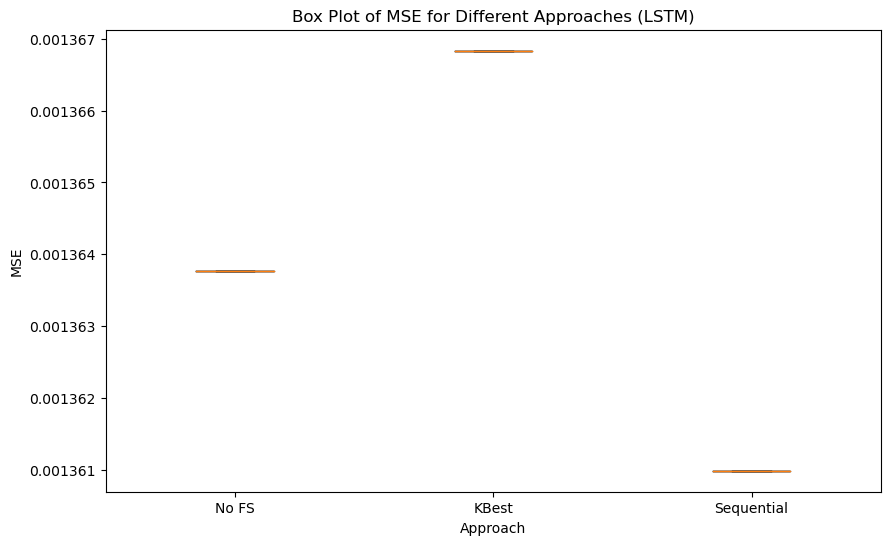

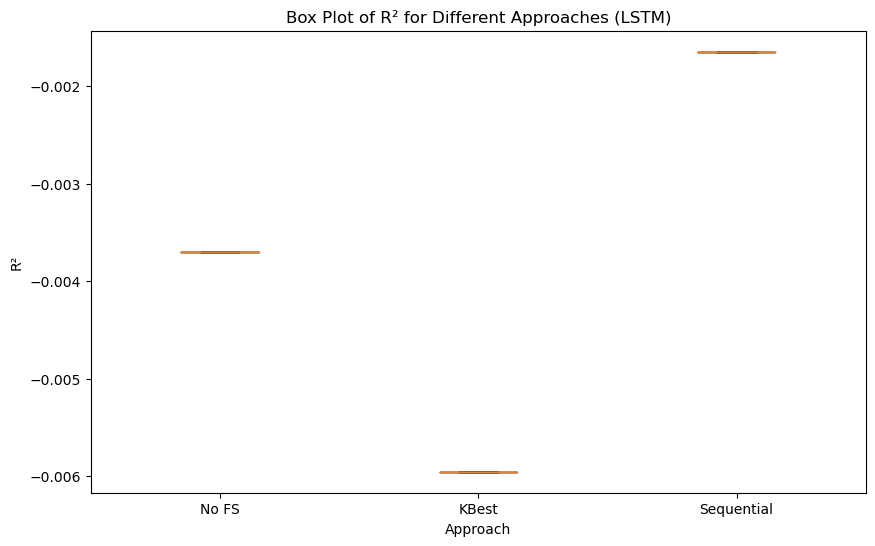

In [271]:
# Assuming LSTM results for each iteration are stored in separate lists
# Create example data for demonstration (replace these with actual iteration results)
lstm_results_no_fs = [LSTM_no_avgMSE for _ in range(15)]  # Replace with actual values if available
lstm_results_kbest = [LSTM_kbest_avgMSE for _ in range(15)]  # Replace with actual values if available
lstm_results_sequential = [LSTM_sequential_avgMSE for _ in range(15)]  # Replace with actual values if available

# Box plot for MSE
plt.figure(figsize=(10, 6))
plt.boxplot([lstm_results_no_fs, lstm_results_kbest, lstm_results_sequential], labels=['No FS', 'KBest', 'Sequential'])
plt.title('Box Plot of MSE for Different Approaches (LSTM)')
plt.xlabel('Approach')
plt.ylabel('MSE')
plt.show()

# LSTM R² results for each iteration
lstm_r2_no_fs = [LSTM_no_avgR2 for _ in range(15)]  # Replace with actual values if available
lstm_r2_kbest = [LSTM_kbest_avgR2 for _ in range(15)]  # Replace with actual values if available
lstm_r2_sequential = [LSTM_sequential_avgR2 for _ in range(15)]  # Replace with actual values if available

# Box plot for R²
plt.figure(figsize=(10, 6))
plt.boxplot([lstm_r2_no_fs, lstm_r2_kbest, lstm_r2_sequential], labels=['No FS', 'KBest', 'Sequential'])
plt.title('Box Plot of R² for Different Approaches (LSTM)')
plt.xlabel('Approach')
plt.ylabel('R²')
plt.show()


# Task 2


In [ ]:
from scipy.optimize import linprog
c = [-10, -8, -7, -6, -5, -4, -3, -2, -1]
A = [[1, 2, 1, 1, 2, 1, 1, 1, 1]]  
b = [100]  

bounds = [(0, 10),  
          (0, 10), 
          (0, 10),  
          (0, 10),  
          (0, 10),  
          (0, 10),  
          (0, 10),  
          (0, 10), 
          (0, 10)]  

res = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='simplex')

if res.success:
    print("Optimal solution found:")
    for i in range(len(res.x)):
        print(f"Resources allocated to reduce injury type {i+1}: {round(res.x[i], 2)} units")
    print("Total Injuries minimized to:", -round(res.fun, 2))  
else:
    print("Optimization failed. Check constraints.")